In [5]:
"""
Alunos:
    David Cardoso Yonekura
    Lucas da Silva Lima
    Rafael Barbosa de Carvalho

"""

import numpy as np
import matplotlib.pyplot as plt
from neuron import Neuron

In [6]:
with open('data/data3.txt', 'rb') as file:
    auxFile = file.read()

data3 = np.frombuffer(auxFile)
data3.resize((int(len(data3)/3)), 3)
X = data3[...,0:2] #[[x01,x02], ...]
y = data3[...,2] #[[yd0], [yd1], ...]

# #adicionando x_0 no x(n)
X = np.insert(X, 2, 1, axis=1)

configs = [[0.4,-100,100], [0.4,-1,1], [0.4,-0.5,0.5],
          [0.1,-100,100], [0.1,-1,1], [0.1,-0.5,0.5],
          [0.01,-100,100], [0.01,-1,1], [0.01,-0.5,0.5]]

fitWeight= []
epoch = []
for i in range(9):
    print("Configurações: ", configs[i])
    n = Neuron(configs[i][0], configs[i][1], configs[i][2])
    print("Vetor de pesos inicial: ",n.weightArray)
    n.iteratedFit(X, y, 100)
    fitWeight.append(n.fitCountWeight)
    epoch.append(n.epoch)
    print("Alterações no vetor de Pesos: ", n.fitCountWeight)
    print("Numero de Epocas: ", n.epoch)
    print("Vetor de Pesos no final: ", np.around(n.weightArray,4))
    print("\n")
    

fw = np.array(fitWeight)
ep = np.array(epoch)

print("Media dos Ajustes no Vetor de Pesos: ", np.around(fw.mean()))
print("Desvio Padrao dos Ajustes no Vetor de Peso: ", np.around(fw.std()))
print("Media das Epocas: ", np.around(ep.mean()))
print("Desvio Padrao das Epocas: ", np.around(ep.std()))

x = [i for i in range(-len(data3),len(data3))]
line = [(n.weightArray[0]/n.weightArray[1]) * i * -1  - n.weightArray[2]/n.weightArray[0] for i in x]# calcula a reta y = mx + b

Configurações:  [0.4, -100, 100]
Vetor de pesos inicial:  [-58.0798765  -89.41316067  42.98406426]
Alterações no vetor de Pesos:  654
Numero de Epocas:  17
Vetor de Pesos no final:  [ 39.2559 -12.8121 -10.6159]


Configurações:  [0.4, -1, 1]
Vetor de pesos inicial:  [-0.96264676  0.50594492 -0.6991333 ]
Alterações no vetor de Pesos:  16
Numero de Epocas:  6
Vetor de Pesos no final:  [ 1.4659 -0.0524 -0.6991]


Configurações:  [0.4, -0.5, 0.5]
Vetor de pesos inicial:  [-0.39339055  0.21969981  0.3525348 ]
Alterações no vetor de Pesos:  8
Numero de Epocas:  4
Vetor de Pesos no final:  [ 0.7224  0.1394 -0.4475]


Configurações:  [0.1, -100, 100]
Vetor de pesos inicial:  [ 26.52976489  36.18716735 -32.58397896]
Alterações no vetor de Pesos:  362
Numero de Epocas:  37
Vetor de Pesos no final:  [ 40.8416  15.866  -30.784 ]


Configurações:  [0.1, -1, 1]
Vetor de pesos inicial:  [ 0.09056889 -0.69463188  0.51438205]
Alterações no vetor de Pesos:  19
Numero de Epocas:  4
Vetor de Pesos no fina

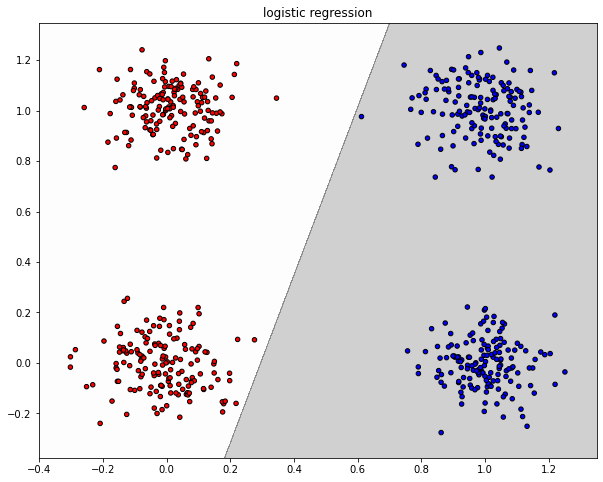

In [7]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.001),
                     np.arange(y_min, y_max, 0.001))

f, axarr = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10, 8))
color = np.where(y == 0, 'r', 'b')

for idx, clf, tt in zip([[0,0]],
                        [n],
                        ['logistic regression']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.array(Z)
    Z = Z.reshape(xx.shape)

    axarr.contourf(xx, yy, Z, alpha=0.2,cmap='Greys')
    axarr.scatter(X[:, 0], X[:, 1], c=color, s=20, edgecolor='k',cmap='Greys')
    axarr.set_title(tt)

plt.show()

